In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 1. Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 2. Baca data
df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Praktikum 4/Data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [6]:
# 3. Melihat Informasi umum
print("Ukuran data:", df.shape)
print("\nTipe data setiap kolom:\n", df.dtypes)
print("\nLima data teratas:\n", df.head())

Ukuran data: (1000, 7)

Tipe data setiap kolom:
 ID                int64
Usia              int64
Status            int64
Kelamin           int64
Memiliki_Mobil    int64
Penghasilan       int64
Beli_Mobil        int64
dtype: object

Lima data teratas:
    ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0   1    32       1        0               0          240           1
1   2    49       2        1               1          100           0
2   3    52       1        0               2          250           1
3   4    26       2        1               1          130           0
4   5    45       3        0               2          237           1



Cek Missing Value:
ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

Nilai unik pada setiap kolom kategorik:

Matriks Korelasi:
                       ID      Usia    Status   Kelamin  Memiliki_Mobil  \
ID              1.000000  0.149779 -0.006634  0.014646        0.068555   
Usia            0.149779  1.000000  0.051476  0.019454        0.090926   
Status         -0.006634  0.051476  1.000000 -0.008561        0.048302   
Kelamin         0.014646  0.019454 -0.008561  1.000000        0.035199   
Memiliki_Mobil  0.068555  0.090926  0.048302  0.035199        1.000000   
Penghasilan     0.254177  0.125859  0.071714 -0.054211        0.137823   
Beli_Mobil      0.168614  0.100127  0.048584 -0.147301        0.102005   

                Penghasilan  Beli_Mobil  
ID                 0.254177    0.168614  
Usia               0.125859    0.100127  
Status             0.071714    0.048584  
Kelam

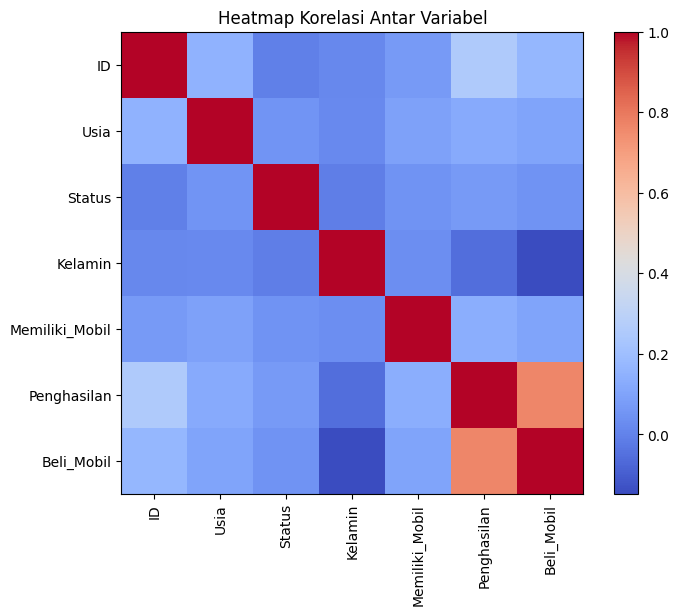

In [7]:
# Cek Missing Value
# 4.1 Cek Missing Value
print("\nCek Missing Value:")
print(df.isnull().sum())

# 4.2 Cek Nilai Unik
print("\nNilai unik pada setiap kolom kategorik:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

# 4.3 Mapping Kolom Kategorik ke Numerik (Label Encoding)
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 4.4 Analisis Korelasi Antar Variabel Numerik
corr = df_encoded.corr()
print("\nMatriks Korelasi:\n", corr)

# 4.5 Visualisasi Heatmap Korelasi
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [9]:
# 5. Pembagian Dataset (Training dan Testing)
# 5.1 Menentukan Fitur (X) dan Target (y)
X = df_encoded.drop(columns=['Beli_Mobil'])
y = df_encoded['Beli_Mobil']

# 5.2 Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
    )

print("\nUkuran data training:", X_train.shape)
print("Ukuran data testing :", X_test.shape)



Ukuran data training: (750, 6)
Ukuran data testing : (250, 6)


In [12]:
# 6. Pembangunan Model Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# 7. Prediksi Model dan Evaluasi Model
y_pred = model.predict(X_test_scaled)

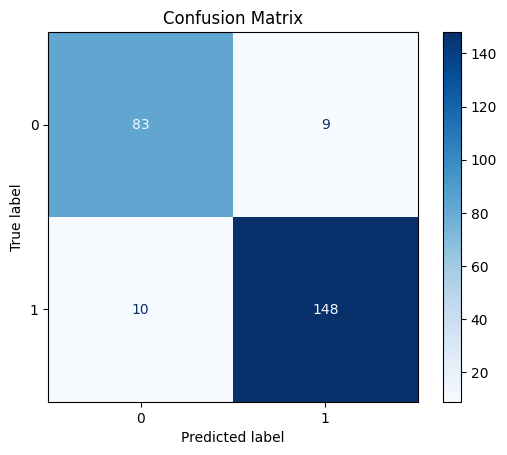

In [15]:
# 8. Visualisasi Hasil Evaluasi
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [16]:
# 9. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        92
           1       0.94      0.94      0.94       158

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [17]:
# 10. Akurasi Model
print("Akurasi Model:", accuracy_score(y_test, y_pred))

Akurasi Model: 0.924


In [19]:
#11. Interpretasi Model Logistic Regression
coefs = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model.coef_[0]
}).sort_values(by='Koefisien', ascending=False)

print("\nKoefisien Model Logistic Regression:")
print(coefs)


Koefisien Model Logistic Regression:
            Fitur  Koefisien
5     Penghasilan   4.959953
4  Memiliki_Mobil   0.147329
0              ID  -0.037045
1            Usia  -0.080056
2          Status  -0.188130
3         Kelamin  -0.641690


In [20]:
# 12. Prediksi Data baru
data_baru = pd.DataFrame({
    'ID': [1001],
    'Usia': [35],
    'Status': [1],
    'Kelamin': [1],
    'Memiliki_Mobil': [0],
    'Penghasilan': [8000000]
})

# Standarisasi data baru (tanpa kolom target)
data_baru_scaled = scaler.transform(data_baru[X.columns])

# Prediksi
prediksi = model.predict(data_baru_scaled)
print("\nHasil prediksi data baru (1 = Beli Mobil, 0 = Tidak):", prediksi[0])


Hasil prediksi data baru (1 = Beli Mobil, 0 = Tidak): 1
